In [ ]:
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.linear_model import  LinearRegression 

%matplotlib inline

: 

In [2]:

def estimate_charge(age,w,b):
    return w*age+b

In [3]:
data_df=pd.read_csv(r"C:\Users\shrey\OneDrive\VS code\Virtual env\data science\DATA\insurance.csv")

In [4]:
non_smoker=data_df[data_df.smoker=='no']
def try_paras(w,b):
    ages=non_smoker.age
    predictions=estimate_charge(ages,w,b)
    target=non_smoker.charges
    plt.plot(ages,predictions,'r',alpha=0.9)
    plt.scatter(ages,target,s=8,alpha=0.8)
    plt.xlabel("Age")
    plt.ylabel("charges")
    plt.legend(["Predictions","Actual"])
    plt.show()
    loss=rmse(targets,predictions)
    print("Loss:",loss)

In [5]:
smokers=data_df[data_df.smoker=='yes']
def try_paras_smoker(w,b):
    ages=smokers.age
    predictions=estimate_charge(ages,w,b)
    target=smokers.charges
    plt.plot(ages,predictions,'r',alpha=0.9)
    plt.scatter(ages,target,s=8,alpha=0.8)
    plt.xlabel("Age")
    plt.ylabel("charges")
    plt.legend(["Predictions","Actual"])
    plt.show()
    loss=rmse(targets,predictions)
    print("Loss:",loss)

In [6]:
def rmse(targets,pred):
    return np.sqrt(np.mean(np.square(targets-pred)))

In [7]:

non_smoker=data_df[data_df.smoker=='no']
non_smoker

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [8]:
inputs=non_smoker[['age','bmi']]
targets=non_smoker.charges

In [9]:
model=LinearRegression().fit(inputs,targets)

In [10]:
predictions=model.predict(inputs)

In [11]:
loss=rmse(targets,predictions)
print(loss)

4662.3128354612945


In [12]:
#Using only bmi
inputs=non_smoker[['bmi']]
targets=non_smoker.charges
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
loss=rmse(targets,predictions)
print(loss)

5969.772531913293


In [13]:
# using all columns of data
inputs=non_smoker[['age','bmi','children']]
targets=non_smoker.charges
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
loss=rmse(targets,predictions)
print(loss)


4608.470405038246


In [14]:
model.coef_

array([265.2938443 ,   5.27956313, 580.65965053])

In [15]:
model.intercept_

-2809.2976032235892

In [16]:
#PRedictions for smokers
smokers=data_df[data_df.smoker=='yes']
smokers

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [17]:
inputs=smokers[['age']]
targets=smokers.charges
model1=LinearRegression().fit(inputs,targets)
smoker_pred=model1.predict(inputs)

print(rmse(targets,smoker_pred))



10711.00334810241


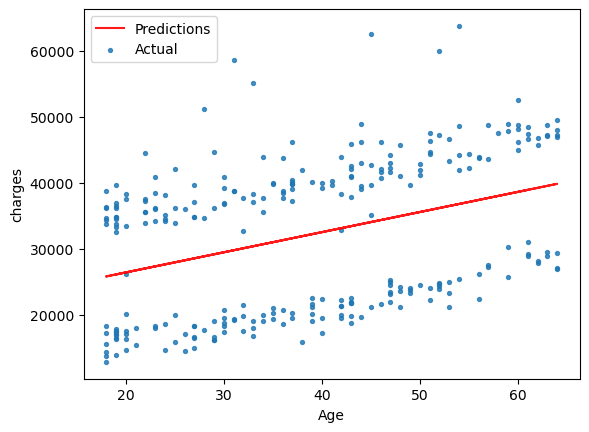

Loss: 10711.00334810241


In [18]:
try_paras_smoker(model1.coef_,model1.intercept_)

In [19]:
smoker_pred.shape


(274,)

In [20]:
smokers.charges

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

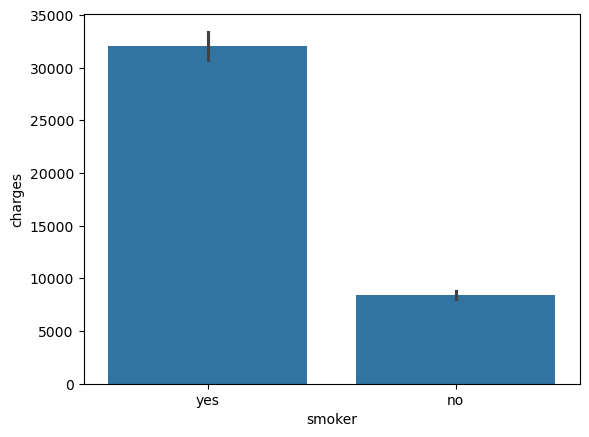

In [21]:
sns.barplot(data=data_df,x='smoker',y='charges')
plt.show()

In [22]:
#CHANGING CATEGORICAL DATA INTO NUMBERS 
#like changes sex male to 1 and female to 0 etc

In [23]:
#BINARY BIT CODING
#CHanging yes and no in smoker to 1 and 0

smoker_code={'yes':1,'no':0}
data_df['smoker_code']=data_df.smoker.map(smoker_code)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   charges      1338 non-null   float64
 7   smoker_code  1338 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [24]:
data_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [25]:
data_df.smoker_code.corr(data_df.charges)

0.7872514304984771

In [26]:
inputs=data_df[['age','bmi','children','smoker_code']]
targets=data_df.charges
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
loss=rmse(targets,predictions)
print(loss)


6056.439217188082


In [27]:
sex_code={'female':0,'male':1}
data_df['sex_code']=data_df.sex.map(sex_code)

In [28]:
inputs=data_df[['age','bmi','children','smoker_code','sex_code']]
targets=data_df.charges
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
loss=rmse(targets,predictions)
print(loss)


6056.100708754546


In [29]:
#ONE -HOT ENCODING


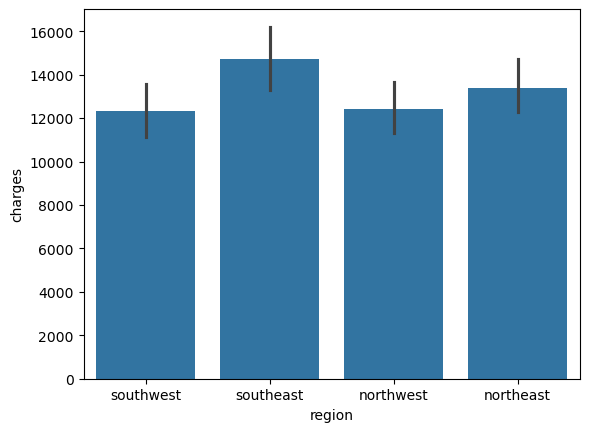

In [30]:
sns.barplot(data=data_df,x='region',y='charges')
plt.show()

In [31]:
from sklearn import preprocessing
enc=preprocessing.OneHotEncoder()
enc.fit(data_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [32]:
one_hot=enc.transform(data_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [33]:
data_df[['northeast','northwest','southeast','southwest']]=one_hot

In [34]:
inputs=data_df[['age','bmi','children','smoker_code','sex_code','northeast','northwest','southeast','southwest']]
targets=data_df.charges
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
loss=rmse(targets,predictions)
print(loss)
print(predictions)

6041.6796511744515
[25293.7130284   3448.60283431  6706.9884907  ...  4149.13248568
  1246.58493898 37085.62326757]
